## Project: Anamoly Detection

### Import Libraries

In [56]:
#Import libraries
import cv2     # for capturing videos
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import zipfile
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, Conv2D,MaxPooling2D, Dropout,GlobalAveragePooling2D
from keras.layers.core import Dense
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.layers import Flatten, TimeDistributed,InputLayer, Reshape
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.engine.input_layer import Input
import matplotlib.image as mpimg
import io
import zipfile
from keras import applications
from keras import Model

### Export Zip Files

In [7]:
zipfile.ZipFile('A.zip').extractall()

In [11]:
zipfile.ZipFile('B-F.zip').extractall()

In [12]:
zipfile.ZipFile('N-1-154.zip').extractall()

In [13]:
zipfile.ZipFile('N-1-337.zip').extractall()

In [14]:
zipfile.ZipFile('N-1-558.zip').extractall()

In [ ]:
#zipfile.ZipFile('N-1-906.zip').extractall()

In [ ]:
#zipfile.ZipFile('N-1-922.zip').extractall()

In [ ]:
#zipfile.ZipFile('Robbery.zip').extractall()

In [ ]:
#zipfile.ZipFile('S-V.zip').extractall()

### Convert videos to numpy array

In [65]:
#Store all files in a directory as list
L=glob.glob("*.mp4")

In [66]:
M=[]
for i in range(0,4):
    if 'Normal' in L[i]:
        M.append(0)
    else:
        M.append(1)

In [67]:
np.unique(M,return_counts=True)

(array([1]), array([4], dtype=int64))

In [68]:
#Convert videos to numpy arrays: dimension: number of videos, number of frames per video, height of a frame, width of a frame
training_data_X=[]
length=[]

for i in range(0,4):
    cap = cv2.VideoCapture(L[i])
    #print(L[i])
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    #print(frameCount)
    cap.release()
    length.append(frameCount)

#max_frame=max(length)
max_frame=300

for i in range(0,4):
    cap = cv2.VideoCapture(L[i])
    frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    #print(frameCount)
    
    if frameCount<max_frame:
        buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))
        #print(frameCount)
    
        fc = 0
        ret = True
    
        while (fc < frameCount  and ret):
            ret, buf[fc] = cap.read()
            fc += 1
        cap.release()
    
    else:
        buf = np.empty((max_frame, frameHeight, frameWidth, 3), np.dtype('uint8'))
        #print(frameCount)
    
        fc = 0
        ret = True
    
        for i in range(int(frameCount/2-max_frame/2),(int(frameCount/2-max_frame/2)+max_frame)):
            while (fc < max_frame  and ret):
                cap.set(1, i)
                ret, buf[fc] = cap.read()
                #plt.imshow(buf[fc])
                fc += 1
        cap.release()
    
    gray=buf
    #if frameCount<max_frame:
    #    gray = [np.zeros((frameHeight,frameWidth))]*frameCount
    #    for i in range(0,frameCount):
    #        gray[i]=cv2.cvtColor(buf[i],cv2.COLOR_RGB2GRAY)
    #    gray=np.asarray(gray)
    #
    #else:
    #    gray = [np.zeros((frameHeight,frameWidth))]*max_frame
    #    for i in range(0,max_frame):
    #        gray[i]=cv2.cvtColor(buf[i],cv2.COLOR_RGB2GRAY)
    #    gray=np.asarray(gray)
    
    width=128
    height=128
    
    if frameCount<max_frame:
        re_size=[np.zeros((height,width))]*frameCount
        for i in range(0,frameCount):
            re_size[i]=cv2.resize(gray[i],(height, width))
        re_size=np.asarray(re_size)
    
    else:
        re_size=[np.zeros((height,width))]*max_frame
        for i in range(0,max_frame):
            re_size[i]=cv2.resize(gray[i],(height, width))
        re_size=np.asarray(re_size)
    
    if frameCount<max_frame:
        normal_size=[np.zeros((height,width))]*frameCount
        for i in range(0,frameCount):
            normal_size[i]=cv2.normalize(re_size[i],None,0,255,cv2.NORM_MINMAX)
        normal_size=np.asarray(normal_size)
        #print(normal_size.shape)
    
    else:
        normal_size=[np.zeros((height,width))]*max_frame
        for i in range(0,max_frame):
            normal_size[i]=cv2.normalize(re_size[i],None,0,255,cv2.NORM_MINMAX)
        normal_size=np.asarray(normal_size)
        #print(normal_size.shape)
    
    #Stacking empty arrays with the existing array so that number of frames per video is same    
    #print(max_frame)
    if frameCount<max_frame:
        empty_array=[np.zeros((height,width))]*(max_frame-frameCount)
        empty_array=np.asarray(empty_array)
        padded_normal=np.vstack((normal_size,empty_array))
    
    else:
        padded_normal=normal_size
    
    #print(padded_normal.shape)
    training_data_X.append(padded_normal)
training_data_X=np.asarray(training_data_X)

In [69]:
training_data_X.shape

(4, 300, 128, 128, 3)

In [70]:
training_data_X2=training_data_X

In [71]:
training_data_X2.shape

(4, 300, 128, 128, 3)

### View numpy arrays

IndexError: index 11 is out of bounds for axis 0 with size 4

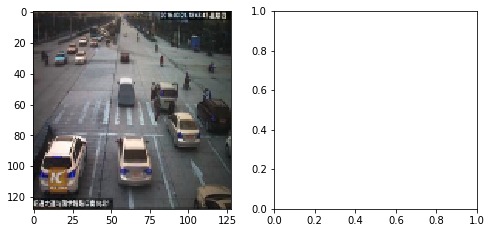

In [72]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(training_data_X2[0][2],cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(training_data_X2[11][129],cmap='gray')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(training_data_X2[8][140],cmap='gray')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(training_data_X2[9][25],cmap='gray')
plt.show()

### Training data preparation

In [ ]:
X_train=training_data_X2

In [ ]:
X_train.shape

In [ ]:
y_train=np.array(M,dtype=np.int)

In [ ]:
y_train.shape

### Model with Time Distributed VGG16 - WIP

In [21]:
# load the model
model = VGG16()
# prepare the image for the VGG model
model.summary()

553467904/553467096 [==============================] - 140s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_

In [73]:
frames=training_data_X2.shape[1]
channels=training_data_X2.shape[4]
rows=training_data_X2.shape[2]
columns=training_data_X2.shape[3]

video = Input(shape=(frames,rows,columns,channels))
cnn_base = VGG16(input_shape=(rows,columns,channels),weights="imagenet",include_top=False)
cnn_out = GlobalAveragePooling2D()(cnn_base.output)
cnn = Model(input=cnn_base.input, output=cnn_out)
cnn.trainable = False
encoded_frames = TimeDistributed(cnn)(video)
encoded_sequence = LSTM(256)(encoded_frames)
hidden_layer = Dense(output_dim=1024, activation="relu")(encoded_sequence)
outputs = Dense(output_dim=1, activation='sigmoid')(hidden_layer)
model = Model([video], outputs)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 300, 128, 128, 3)  0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, 300, 512)          14714688  
_________________________________________________________________
lstm_5 (LSTM)                (None, 256)               787456    
_________________________________________________________________
dense_7 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 1025      
Total params: 15,766,337
Trainable params: 15,766,337
Non-trainable params: 0
_________________________________________________________________


C:\Users\thaque2050\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("gl...)`
  if __name__ == '__main__':
C:\Users\thaque2050\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
  del sys.path[0]
C:\Users\thaque2050\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


### Train Models

In [74]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Saving the model that performed the best on the validation set
checkpoint = ModelCheckpoint(filepath='best_model_weight.hdf5', save_best_only=True, verbose=1)

In [77]:
# Training the model for 10 epochs
model.fit(X_train, y_train, batch_size=1,epochs=1,validation_split=0.3, verbose=1, callbacks=[checkpoint])

Train on 14 samples, validate on 6 samples
Epoch 1/1


ResourceExhaustedError: OOM when allocating tensor with shape[300,64,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node time_distributed_9/block1_conv2/convolution}} = Conv2D[T=DT_FLOAT, _class=["loc:@train...propFilter"], data_format="NCHW", dilations=[1, 1, 1, 1], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](time_distributed_9/block1_conv1/Relu, block1_conv2_11/kernel/read)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_1/mul/_2457}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_3302_loss_1/mul", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
